<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220220_numpy_subplot_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2

In [ ]:
key = cv2.waitKey(0) & 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np


f = np.zeros((2,3))
f

array([[0., 0., 0.],
       [0., 0., 0.]])

In [13]:
# 아래 5가지 출력 값이 모두 같다
f.reshape((6)) # (6,)
f.reshape((-1)) # (6,)
f.reshape((6,)) # (,6) : 오류
np.ravel(f)
f.ravel()

array([0., 0., 0., 0., 0., 0.])

In [17]:
data = np.arange(12).reshape(4,3)
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [23]:
data_split = np.split(data, 2, 0) # hsplit, vsplit으로 하면 축지정 필요 없음

In [26]:
np.array(data_split) # split() 리스트 형태로 반환

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [35]:
data_vsplit = np.vsplit(data, 2)

In [36]:
np.array(data_vsplit)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [37]:
np.where(data>5) # 배열에서 조건에해당하는 인덱스를 튜플(x, y)로 반환 : ([x1, x2, x3, ...], [y1, y2, y3, ...])

(array([2, 2, 2, 3, 3, 3]), array([0, 1, 2, 0, 1, 2]))

In [45]:
condition = np.where(data>5)
np.stack((condition[0], condition[1]), 1) # 2차원 배열 : [[x1, y1], [x2, y2], ...]

array([[2, 0],
       [2, 1],
       [2, 2],
       [3, 0],
       [3, 1],
       [3, 2]])

In [48]:
data[condition] = 1 # where로 만든 조건을 적용

In [49]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [1, 1, 1],
       [1, 1, 1]])

In [52]:
np.where(data>5, 2, data) # 배열에서 조건에 해당하면 2, 그렇지 않으면 data 원래값

array([[0, 1, 2],
       [3, 4, 5],
       [1, 1, 1],
       [1, 1, 1]])

In [54]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# shape(3,4)
> 높이/height, Rows = 3

> 폭/widht, columns = 4

In [55]:
np.sum(a, 0) # axis=0 기준으로 계산, shape(axis=0, axis=1, axis=2, ...)

array([12, 15, 18, 21])

In [56]:
np.min(a)

0

In [57]:
np.min(a, 0) # axis=0 기준으로 가장 작은 값들

array([0, 1, 2, 3])

In [58]:
np.min(a, 1) # axis=1 기준으로 가장 작은 값들

array([0, 4, 8])

In [63]:
name = "RGB"
name[::-1]

'BGR'

# subplot, add_subplot, subplots 구분

## 1. 별도의 캔버스 생성 없이 :  subplot()

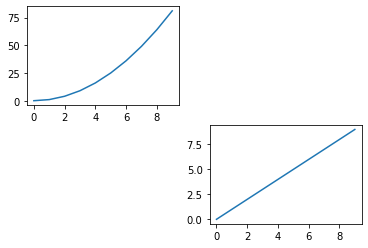

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
plt.subplot(2,2,1) # 캔버스 생성, 캔버스에 축 생성, 축에 plot하는 객체지향적 방식이 아닌 함수형 프로그래밍에 가깝다
plt.plot(x, x**2)
# 다음 subplot()이 선언되기 전까지 plot()을 꾸밀 수 있다

plt.subplot(2,2,4)
plt.plot(x, x)

## 2. 캔버스 생성 → add_subplot()으로 축 선언 → 축에 plot

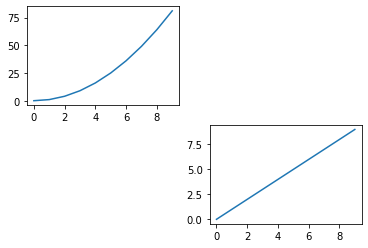

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() # 캔버스 생성
ax1 = fig.add_subplot(2,2,1) # 캔버스에 subplot 축(ax) 추가 
ax1.plot(x, x**2) # 축에 plot

ax4 = fig.add_subplot(2,2,4)
ax4.plot(x, x)

## 3. 캔버스+축 생성 : subplots() → 이미 만들어진 축에 plot (빈축 있을 수 있음)

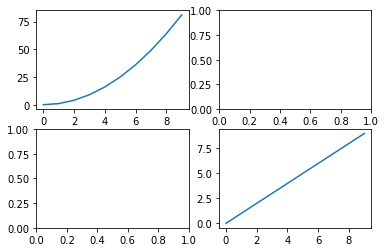

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2) # 캔버스, 축 생성(미리 빈축을 다만들어 놓음)
axs[0,0].plot(x, x**2)
axs[1,1].plot(x, x)